In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [338]:
N = 100
X = np.linspace(0, 10, N)

In [339]:
a = 1.14
b = 2
Y = a * X + b + 1.5*np.random.randn(N)
Y_left  = np.copy(Y)
Y_right  = np.copy(Y)
Y_center = np.copy(Y)

In [340]:
N_outlayer = 10

In [341]:
outlayer_points_left = np.random.randint(0, 20, N_outlayer)
outlayer_points_right = np.random.randint(80, 100, N_outlayer)
outlayer_points_center = np.random.randint(20, 80, N_outlayer)

outlayer_direction = np.where(np.random.randint(-1, 1, N_outlayer)==0, -1, 1)

In [342]:
for i, el in enumerate(outlayer_points_left):
    Y_left[el] += outlayer_direction[i] * (5 + 5* np.abs(np.random.randn()))
    
for i, el in enumerate(outlayer_points_right):
    Y_right[el] += outlayer_direction[i] * (5 + 5* np.abs(np.random.randn()))

for i, el in enumerate(outlayer_points_center):
    Y_center[el] += outlayer_direction[i] * (5 + 5* np.abs(np.random.randn()))

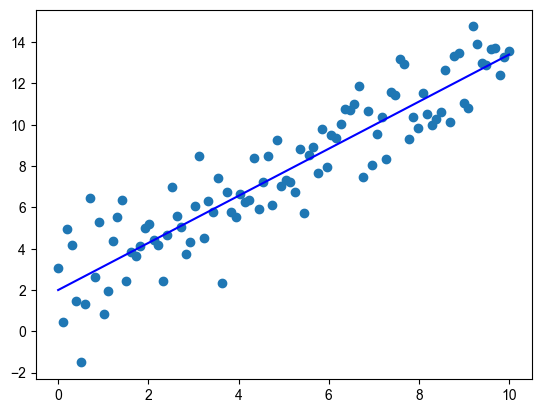

In [343]:
plt.scatter(X, Y)
plt.plot(X, a*X+b, c='b')
plt.show()

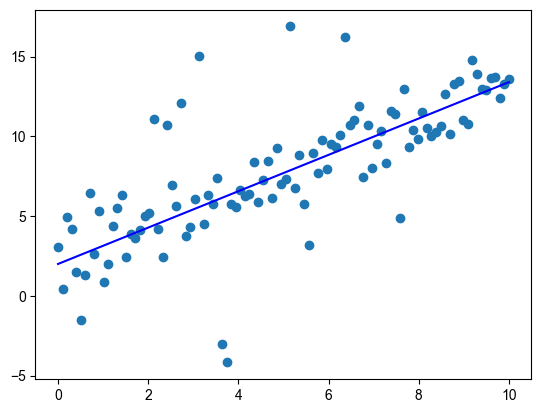

In [344]:
plt.scatter(X, Y_center)
plt.plot(X, a*X+b, c='b')
plt.show()

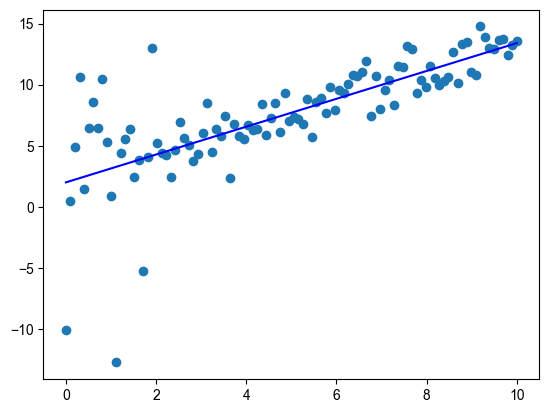

In [345]:
plt.scatter(X, Y_left)
plt.plot(X, a*X+b, c='b')
plt.show()

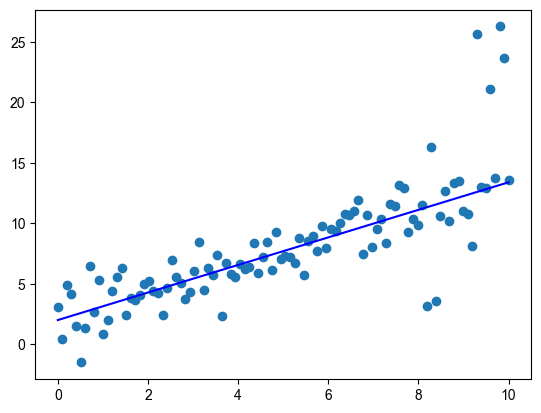

In [346]:
plt.scatter(X, Y_right)
plt.plot(X, a*X+b, c='b')
plt.show()

In [347]:
def mae_loss(params, X, y):
    a, b = params
    return np.mean(np.abs(y -(a*X+b)))

def rmse_loss(params, X, y):
    a, b = params
    return np.sqrt(np.mean(np.power(y -(a*X+b),2)))

def mape_loss(params, X, y):
    a, b = params
    return np.mean(np.abs(y -(a*X+b))/(np.abs(y)+0.0000001))

def smape_loss(params, X, y):
    a, b = params
    return 2*np.mean(np.abs(y -(a*X+b))/(np.abs(y)+np.abs(a*X+b)))

In [348]:
initial_params = [1.5,1.5]

In [349]:
Y_ = Y

In [350]:
MAE = minimize(mae_loss, initial_params, args=(X, Y_))
RMSE = minimize(rmse_loss, initial_params, args=(X, Y_))
SMAPE = minimize(smape_loss, initial_params, args=(X, Y_))
MAPE = minimize(mape_loss, initial_params, args=(X, Y_))

In [351]:
MAPE

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.23163587867268634
        x: [ 1.362e+00  5.048e-01]
      nit: 19
      jac: [-5.516e-03 -1.690e-03]
 hess_inv: [[ 8.207e-04 -5.365e-04]
            [-5.365e-04  3.515e-04]]
     nfev: 416
     njev: 137

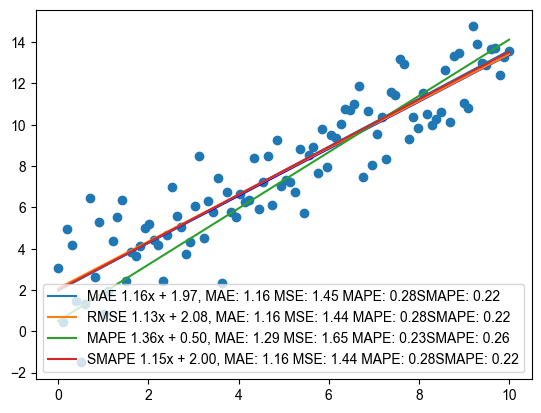

In [352]:
MAE = minimize(mae_loss, initial_params, args=(X, Y_))
RMSE = minimize(rmse_loss, initial_params, args=(X, Y_))
SMAPE = minimize(smape_loss, initial_params, args=(X, Y_))
MAPE = minimize(mape_loss, initial_params, args=(X, Y_))

plt.scatter(X, Y_)
plt.plot(X, a*X+b, c='b')
for method_name, method in zip(["MAE","RMSE","MAPE","SMAPE"], [MAE,RMSE,MAPE,SMAPE]):
    a, b = method.x
    plt.plot(X, a*X + b, 
             label =f"{method_name} {a:.2f}x + {b:.2f}, MAE: {mae_loss((a,b), X,Y_):.2f} MSE: {rmse_loss((a,b), X,Y_):.2f} MAPE: {mape_loss((a,b), X,Y_):.2f}SMAPE: {smape_loss((a,b), X,Y_):.2f}")
plt.legend()
plt.show()

In [353]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, symetr

ImportError: cannot import name 'symetr' from 'sklearn.metrics' (C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\metrics\__init__.py)

In [354]:
Y_

array([ 3.08098407,  0.43884566,  4.93187778,  4.16601293,  1.48437194,
       -1.50740359,  1.33015299,  6.45734002,  2.64755474,  5.2972257 ,
        0.85441674,  1.97227021,  4.3918431 ,  5.52728891,  6.33950967,
        2.42659103,  3.85894808,  3.65703038,  4.11402363,  5.00200774,
        5.19978298,  4.43347862,  4.20040471,  2.44589781,  4.65929674,
        6.97244754,  5.60400557,  5.04889628,  3.74940986,  4.34591956,
        6.08143942,  8.4770999 ,  4.51485157,  6.33075365,  5.76741292,
        7.40540793,  2.35693281,  6.74835757,  5.77448299,  5.54190684,
        6.6617284 ,  6.26427184,  6.35869234,  8.37797046,  5.90110655,
        7.24506642,  8.47872543,  6.11935982,  9.27764979,  7.04108971,
        7.32853587,  7.21219736,  6.74205622,  8.81090628,  5.73521009,
        8.5494913 ,  8.94422997,  7.67497281,  9.79903662,  7.95187248,
        9.52592197,  9.33933768, 10.06200329, 10.78852147, 10.71414588,
       11.02614418, 11.89561689,  7.4667376 , 10.69052582,  8.03

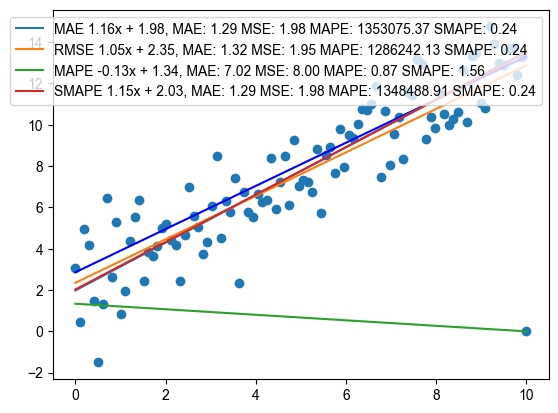

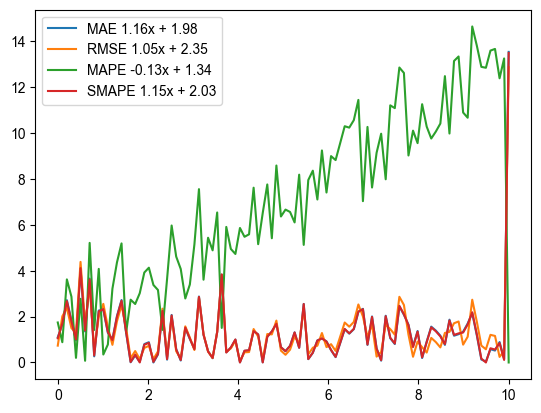

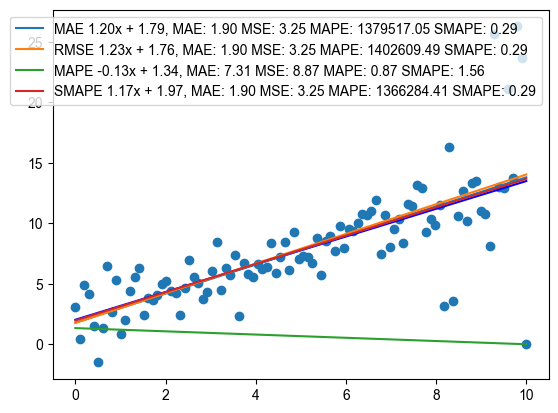

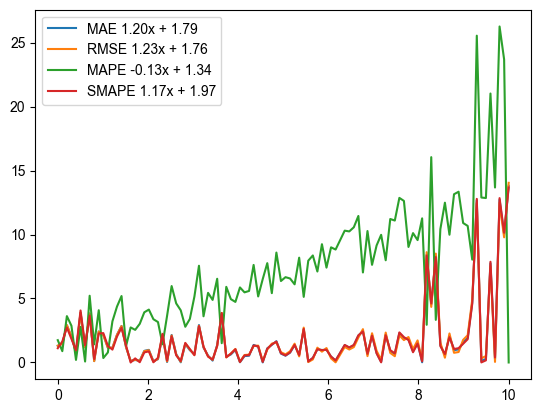

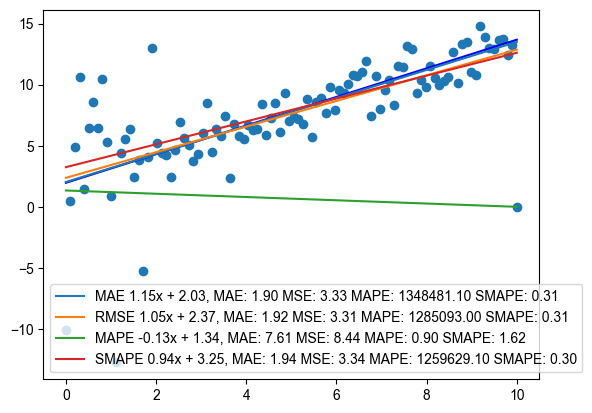

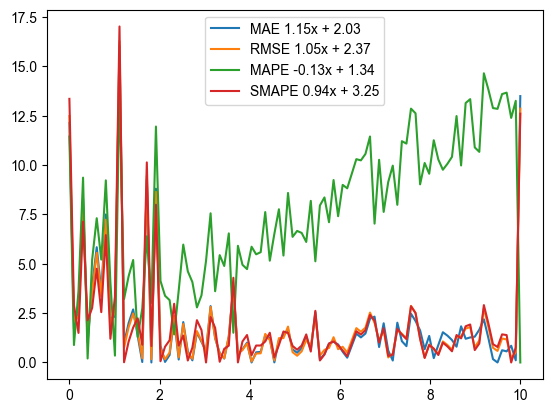

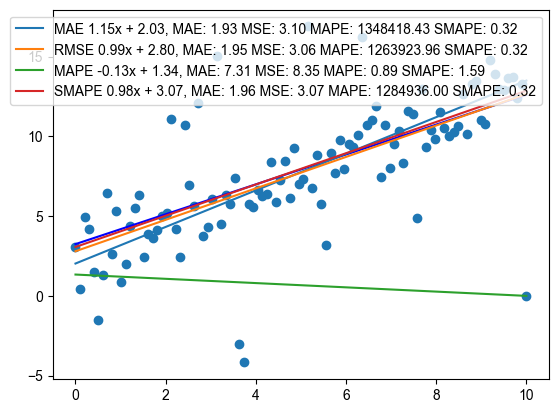

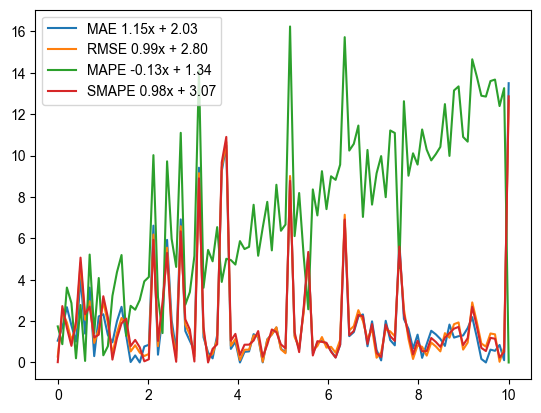

In [358]:
for Y_ in [Y, Y_right, Y_left, Y_center]:
    MAE = minimize(mae_loss, initial_params, args=(X, Y_))
    RMSE = minimize(rmse_loss, initial_params, args=(X, Y_))
    SMAPE = minimize(smape_loss, initial_params, args=(X, Y_))
    MAPE = minimize(mape_loss, initial_params, args=(X, Y_))
    Y_[-1] = 0.0000000001
    plt.scatter(X, Y_)
    plt.plot(X, a*X+b, c='b')
    for method_name, method in zip(["MAE","RMSE","MAPE","SMAPE"], [MAE,RMSE,MAPE,SMAPE]):
        a, b = method.x
        plt.plot(X, a*X + b, label =f"{method_name} {a:.2f}x + {b:.2f}, MAE: {mae_loss((a,b), X,Y_):.2f} MSE: {rmse_loss((a,b), X,Y_):.2f} MAPE: {mape_loss((a,b), X,Y_):.2f} SMAPE: {smape_loss((a,b), X,Y_):.2f}")
    plt.legend()
    plt.show()

    for method_name, method in zip(["MAE","RMSE","MAPE","SMAPE"], [MAE,RMSE,MAPE,SMAPE]):
        a, b = method.x
        plt.plot(X, np.abs(a*X + b - Y_), label =f"{method_name} {a:.2f}x + {b:.2f}")
    plt.legend()
    plt.show()

In [356]:
MAE

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.7920572705698288
        x: [ 1.157e+00  1.988e+00]
      nit: 9
      jac: [-2.828e-02 -2.000e-02]
 hess_inv: [[ 5.077e-02 -5.831e-02]
            [-5.831e-02  6.697e-02]]
     nfev: 310
     njev: 103

In [152]:
mae_a, mae_b = MAE.x
rmse_a, rmse_b = RMSE.x

MAE 1.47


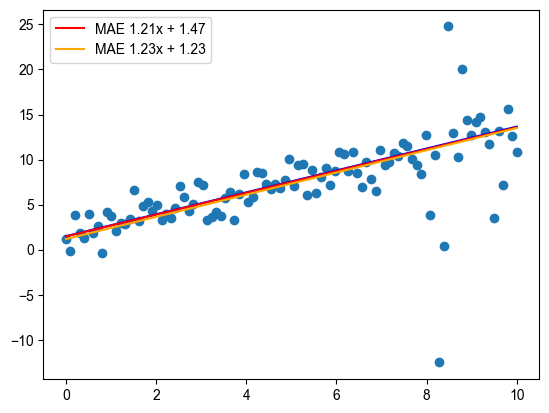

In [153]:
plt.scatter(X,Y_right)
plt.plot(X, a*X+b, c='b')
label = f"MAE {mae_b:.2f}"
print(label)
plt.plot(X, mae_a*X+mae_b, c='r', label =f"MAE {mae_a:.2f}x + {mae_b:.2f}")
plt.plot(X, rmse_a*X+rmse_b, c='orange', label =f"MAE {rmse_a:.2f}x + {rmse_a:.2f}")
plt.legend()
plt.show()

In [70]:
epsilon = np.linspace(-10,10,1000)

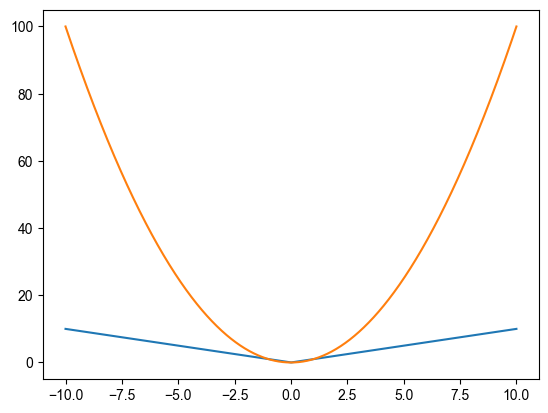

In [118]:
plt.plot(epsilon, np.abs(0 - epsilon))
plt.plot(epsilon, np.square(0 - epsilon))

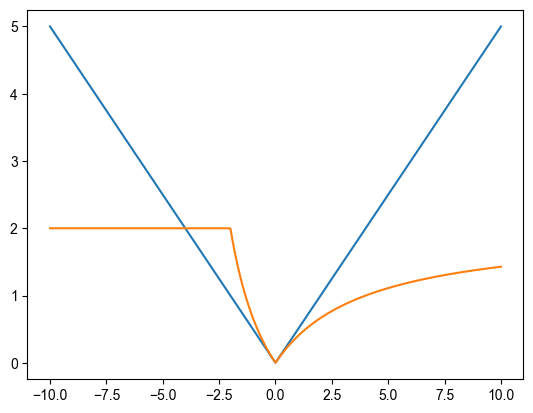

In [189]:
plt.plot(epsilon, np.abs(epsilon)/2)
plt.plot(epsilon, 2*np.abs(epsilon)/(2+ np.abs(2 + epsilon)))

In [120]:
2*np.abs(epsilon)/(1+ np.abs(1 + epsilon))

array([2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.     